In [7]:
import os

exp_root_path = os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/06_"
output_fig_path = os.environ["FIGURES"] + "/07_BBO/04_BBO_chem/01_QED/06_"
os.makedirs(output_fig_path, exist_ok=True)


dataset_paths = {
    "methane": None,
    "QM9": os.environ["DATA"] + "/00_datasets/DFT/QM9/filtered_QM9_charges_radicals_stereo.smi",
    "QM9_sw": os.environ["DATA"] + "/00_datasets/DFT/QM9/filtered_QM9_charges_radicals_stereo_sillywalks.smi",

#     "ChEMBL": os.environ["DATA"] + "/00_datasets/ChEMBL25/filtered_ChEMBL_charges_radicals_stereo_CNOF.smi",
    "ChEMBL_CNOF_filtered": os.environ["DATA"] + "/00_datasets/ChEMBL25/filtered_ChEMBL_charges_radicals_stereo_CNOF_QED_below_QM9.smi"
}



datasets_values = dataset_paths.keys()
xi_values = [0.01]
merit_values = ["EI", "POI", "surrogate"]
kernel_values = ["RBF", "DotProduct"]
optim_depths = [10]
sw_thresholds = [0, 1]
desc_values = ["shingles"]

ERT_TARGETS = [0.9, 0.94, 0.948]



In [8]:
def compute_path(path_root, dataset_value, xi_value, merit_value, kernel_value, optim_depth, sw_thresh, desc):
    if desc == "random":
        desc_path_key = "_random_desc"
    else:
        desc_path_key = ""
    
    return path_root + dataset_value + "_xi_" + str(xi_value) + "_" + merit_value + "_" + kernel_value + desc_path_key + "_depth_" + str(optim_depth) + "_sw_" + str(sw_thresh) + "/"
    

parameters_all = []
models_paths = []
parameters = []

for dataset_value in datasets_values:
    for xi_value in xi_values:
        for merit_value in merit_values:
            for kernel_value in kernel_values:
                for optim_depth in optim_depths:
                    for sw_thresh in sw_thresholds:
                        for desc in desc_values:
                            for run_id in range(1, 11):
                                parameters_all.append({
                                    "dataset_value": dataset_value,
                                    "xi_value": xi_value,
                                    "merit_value": merit_value,
                                    "kernel_value": kernel_value,
                                    "optim_depth": optim_depth,
                                    "sw_thresh": sw_thresh,
                                    "run_id": run_id,
                                    "desc": desc
                                })

for param in parameters_all:
    if param["run_id"] == 1:
        models_paths.append(compute_path(exp_root_path, param["dataset_value"], param["xi_value"],
                                         param["merit_value"], param["kernel_value"], param["optim_depth"],
                                         param["sw_thresh"], param["desc"]))
        parameters.append(param)

In [9]:
len(parameters_all)

480

In [28]:
from bbomol.postprocessing.postprocessing import load_complete_input_results
from bbomol.postprocessing.plot import plot_best_so_far
from bbomol.postprocessing import plot
plot.save_show = False
plot.init_figure = False
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
linestyles = ['solid', 'dashed', 'dotted', 'dashdot', (0, (5, 10)), (0, (3, 10, 1, 10)), (0, (1, 10))]
from os.path import join
import numpy as np
def get_linestyle_color(name):
    if "EI" in name:
            linestyle = linestyles[0]
    elif "POI" in name:
        linestyle = linestyles[1]
    elif "id" in name:
        linestyle = linestyles[2]
    else:
        linestyle = linestyles[3]

    if "RBF" in name:
        c = sns.color_palette()[0]
    elif "DotProduct" in name:
        c = sns.color_palette()[1]
    else:
        c = sns.color_palette()[3]

    return linestyle, c

def plot_for_dataset(BBO_dict, EvoMol_dict, DOE_name, ylim):

    res_dict_no_filter = load_complete_input_results(BBO_dict["sw_off"], EvoMol_dict["sw_off"],
                                                     include_dataset_init_step=True,
                                                     sub_experiment_names=[str(i) for i in range(1, 11)])
    res_dict_filter = load_complete_input_results(BBO_dict["sw_on"], EvoMol_dict["sw_on"],
                                                  include_dataset_init_step=True,
                                                  sub_experiment_names=[str(i) for i in range(1, 11)])

    plot_data_no_filter = plot_best_so_far(res_dict_no_filter)
    plot_data_filter = plot_best_so_far(res_dict_filter)




    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))
    plt.suptitle("Initialisation " + DOE_name)


#     plt.subplot(1, 2, 1)
#     plt.ylim(ylim)

    for data in plot_data_no_filter:
        name, x, y = data

        linestyle, c = get_linestyle_color(name)
        ax1.plot(x, y, label=name, linestyle=linestyle, color=c)
        ax1.set_ylim(ylim)
        ax1.set_xlim((0, 2000))
        ax1.legend()
        ax1.set_title("Sans filtrage")
        ax1.set_ylabel("QED")
        
        ax2.set_yticks(np.arange(0.8, 0.96, 0.01))

#         line = ax1.plot([-25], [0.90], color=sns.color_palette()[4], marker='>', alpha=1)[0]
#         line.set_clip_on(False)
#         line = ax1.plot([-25], [0.92], color=sns.color_palette()[5], marker=">", alpha=1)[0]
#         line.set_clip_on(False)
#         line = ax1.plot([-25], [0.95], color=sns.color_palette()[6], marker=">", alpha=1)[0]
#         line.set_clip_on(False)



#     plt.subplot(1, 2, 2)
#     plt.ylim(ylim)

    for data in plot_data_filter:
        name, x, y = data

        linestyle, c = get_linestyle_color(name)
        ax2.plot(x, y, label=name, linestyle=linestyle, color=c)
        ax2.set_ylim(ylim)
        ax2.set_xlim((0, 2000))
        ax2.set_title("Filtrage sillywalks")
        
        ax2.set_yticks(np.arange(0.8, 0.96, 0.01))

#         line = ax2.plot([-25], [0.90], color=sns.color_palette()[4], marker='>', alpha=1)[0]
#         line.set_clip_on(False)
#         line = ax2.plot([-25], [0.92], color=sns.color_palette()[5], marker=">", alpha=1)[0]
#         line.set_clip_on(False)
#         line = ax2.plot([-25], [0.95], color=sns.color_palette()[6], marker=">", alpha=1)[0]
#         line.set_clip_on(False)
#         plt.legend()

    plt.tight_layout()

    plt.savefig(join(output_fig_path, DOE_name + ".jpg"), dpi=200)




In [29]:
from os.path import exists

BBO_exp_dict_methane = {"sw_off": {}, "sw_on": {}}
BBO_exp_dict_qm9 = {"sw_off": {}, "sw_on": {}}
BBO_exp_dict_chembl = {"sw_off": {}, "sw_on": {}}

def get_model_name(merit_value, kernel_value):
    
#     output_name = "(" + (merit_value if merit_value != "surrogate" else "id") + ", " + kernel_value + ")"
    output_name = "BBOMol " + (merit_value if merit_value != "surrogate" else "id") + ", " + kernel_value
    
    return output_name


for i in range(len(parameters)):
    if exists(models_paths[i]):
        if parameters[i]["dataset_value"] == "methane":
            d = BBO_exp_dict_methane
        elif parameters[i]["dataset_value"] == "QM9" or parameters[i]["dataset_value"] == "QM9_sw":
            d = BBO_exp_dict_qm9
        elif parameters[i]["dataset_value"] == "ChEMBL_CNOF_filtered":
            d = BBO_exp_dict_chembl
          
        sw_key = "sw_off" if parameters[i]["sw_thresh"] == 1 else "sw_on"
        d[sw_key][get_model_name(parameters[i]["merit_value"], parameters[i]["kernel_value"])] = models_paths[i]


In [30]:
import os

EvoMol_exp_dict_methane = {
    "sw_off": {"EvoMol": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.21_test_EvoMol_QED_CONF/"},
    "sw_on": {"EvoMol": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.31_test_EvoMol_QED_CONF_sw_0/"}
}

EvoMol_exp_dict_QM9 = {
    "sw_off": {"EvoMol": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.22_test_EvoMol_QED_DOE_random_QM9_CONF/"},
    "sw_on": {"EvoMol": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.32_test_EvoMol_QED_DOE_random_QM9_sw_CONF_sw_0/"}
}

EvoMol_exp_dict_ChEMBL = {
    "sw_off": {"EvoMol": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.24_test_EvoMol_QED_DOE_random_ChEMBL_filtered_CONF/"},
    "sw_on": {"EvoMol": os.environ["DATA"] + "/07_BBO/04_BBO_chem/01_QED/01.34_test_EvoMol_QED_DOE_random_ChEMBL_filtered_CONF_sw_0/"}
}




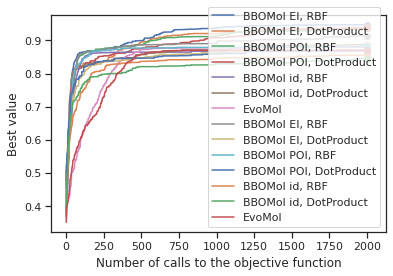

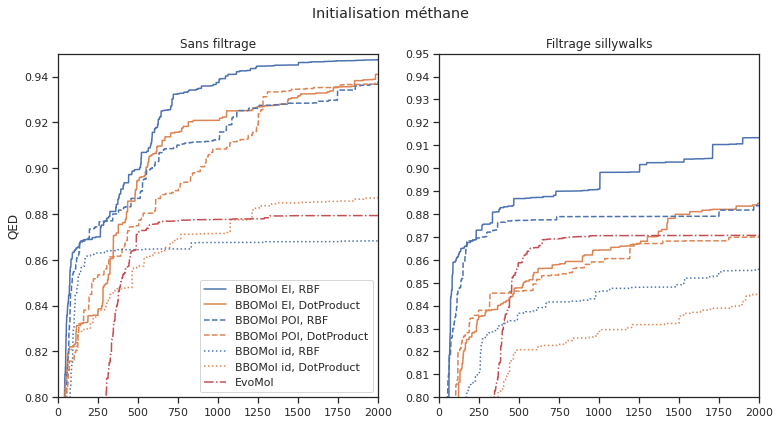

In [31]:
plot_for_dataset(BBO_exp_dict_methane, EvoMol_exp_dict_methane, "méthane", (0.8, 0.95))

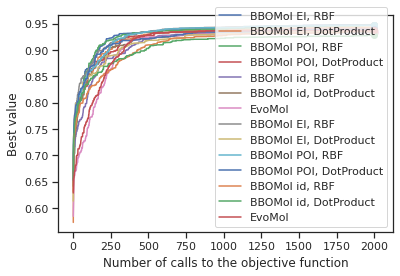

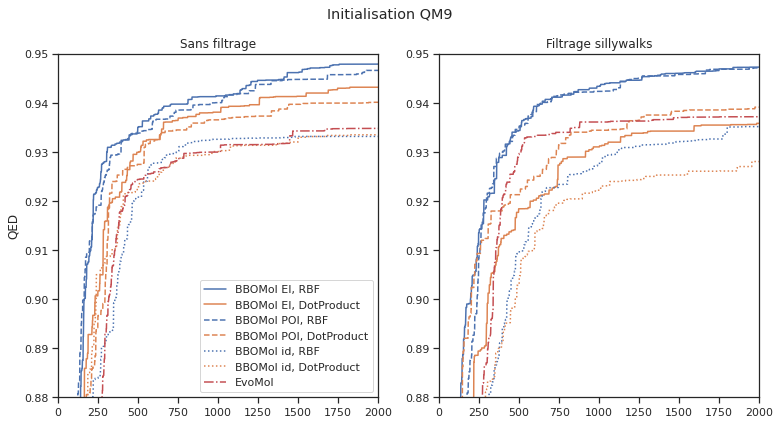

In [8]:
plot_for_dataset(BBO_exp_dict_qm9, EvoMol_exp_dict_QM9, "QM9", (0.88, 0.95))

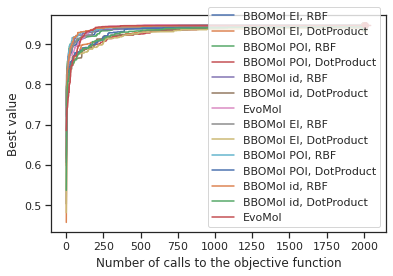

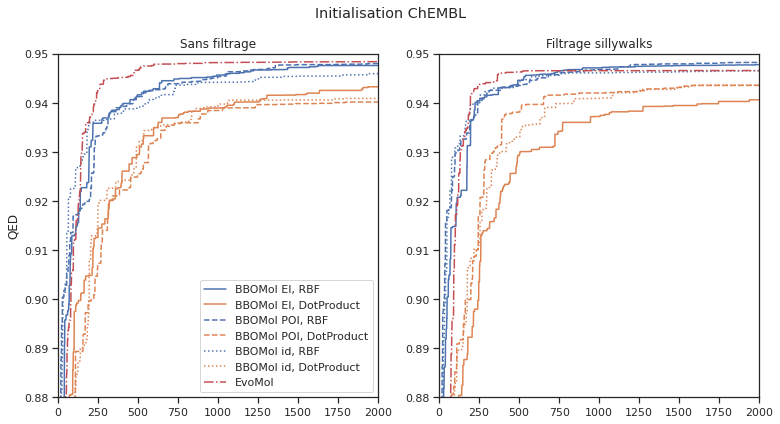

In [9]:
plot_for_dataset(BBO_exp_dict_chembl, EvoMol_exp_dict_ChEMBL, "ChEMBL", (0.88, 0.95))

In [10]:
from bbomol.postprocessing.plot import display_ert
from bbomol.postprocessing.postprocessing import load_complete_input_results

def ert_for_dataset(BBO_dict, EvoMol_dict):
    
    res_dict_no_filter = load_complete_input_results(BBO_dict["sw_off"], EvoMol_dict["sw_off"], 
                                                     include_dataset_init_step=True,
                                                     sub_experiment_names=[str(i) for i in range(1, 11)])
    res_dict_filter = load_complete_input_results(BBO_dict["sw_on"], EvoMol_dict["sw_on"], 
                                                  include_dataset_init_step=True,
                                                  sub_experiment_names=[str(i) for i in range(1, 11)])
    
    ert_data_no_filter = display_ert(res_dict_no_filter, ert_targets=ERT_TARGETS)
    ert_data_filter = display_ert(res_dict_filter, ert_targets=ERT_TARGETS)

    

In [11]:
ert_for_dataset(BBO_exp_dict_methane, EvoMol_exp_dict_methane)

Experiment                      0.9                      0.94  \
0          BBOMol EI, RBF             482.2 (10.0)             1078.1 (10.0)   
1   BBOMol EI, DotProduct             674.2 (10.0)  1945.7142857142858 (7.0)   
2         BBOMol POI, RBF  957.5555555555555 (9.0)  1894.2857142857142 (7.0)   
3  BBOMol POI, DotProduct             816.5 (10.0)  2223.4285714285716 (7.0)   
4          BBOMol id, RBF                inf (0.0)                 inf (0.0)   
5   BBOMol id, DotProduct  5641.333333333333 (3.0)             18767.0 (1.0)   
6                  EvoMol            18583.0 (1.0)             19417.0 (1.0)   

           0.948  
0      inf (0.0)  
1   8895.0 (2.0)  
2      inf (0.0)  
3      inf (0.0)  
4      inf (0.0)  
5  18975.0 (1.0)  
6  19625.0 (1.0)

Experiment                       0.9                     0.94  \
0          BBOMol EI, RBF  1842.4285714285713 (7.0)  5586.666666666667 (3.0)   
1   BBOMol EI, DotProduct             4355.25 (4.0)                inf (0.0)   
2         BBOMol POI, RBF              9166.0 (2.0)            18735.0 (1.0)   
3  BBOMol POI, DotProduct             19192.0 (1.0)                inf (0.0)   
4          BBOMol id, RBF                 inf (0.0)                inf (0.0)   
5   BBOMol id, DotProduct                 inf (0.0)                inf (0.0)   
6                  EvoMol                 inf (0.0)                inf (0.0)   

           0.948  
0   9748.5 (2.0)  
1      inf (0.0)  
2  19768.0 (1.0)  
3      inf (0.0)  
4      inf (0.0)  
5      inf (0.0)  
6      inf (0.0)

In [12]:
ert_for_dataset(BBO_exp_dict_qm9, EvoMol_exp_dict_QM9)

Experiment                      0.9                      0.94  \
0          BBOMol EI, RBF             161.9 (10.0)              825.0 (10.0)   
1   BBOMol EI, DotProduct             213.8 (10.0)            1401.625 (8.0)   
2         BBOMol POI, RBF             160.9 (10.0)              904.5 (10.0)   
3  BBOMol POI, DotProduct             243.4 (10.0)  2257.6666666666665 (6.0)   
4          BBOMol id, RBF             360.8 (10.0)                 inf (0.0)   
5   BBOMol id, DotProduct             260.8 (10.0)             19500.0 (1.0)   
6                  EvoMol  527.4444444444445 (9.0)              3099.0 (5.0)   

           0.948  
0   3494.8 (5.0)  
1  19746.0 (1.0)  
2   9512.5 (2.0)  
3   9274.5 (2.0)  
4      inf (0.0)  
5      inf (0.0)  
6   4360.5 (4.0)

Experiment           0.9                     0.94  \
0          BBOMol EI, RBF  188.2 (10.0)             696.0 (10.0)   
1   BBOMol EI, DotProduct  303.6 (10.0)             2925.4 (5.0)   
2         BBOMol POI, RBF  229.9 (10.0)             742.7 (10.0)   
3  BBOMol POI, DotProduct  229.1 (10.0)             2275.5 (6.0)   
4          BBOMol id, RBF  449.3 (10.0)  6143.333333333333 (3.0)   
5   BBOMol id, DotProduct  571.5 (10.0)            18976.0 (1.0)   
6                  EvoMol  314.9 (10.0)  5306.666666666667 (3.0)   

           0.948  
0   9063.0 (2.0)  
1      inf (0.0)  
2   8871.0 (2.0)  
3  19247.0 (1.0)  
4      inf (0.0)  
5      inf (0.0)  
6      inf (0.0)

In [13]:
ert_for_dataset(BBO_exp_dict_chembl, EvoMol_exp_dict_ChEMBL)

Experiment                       0.9                     0.94  \
0          BBOMol EI, RBF               79.4 (10.0)             369.2 (10.0)   
1   BBOMol EI, DotProduct              137.8 (10.0)             1361.5 (8.0)   
2         BBOMol POI, RBF               48.6 (10.0)             481.3 (10.0)   
3  BBOMol POI, DotProduct  345.22222222222223 (9.0)           1092.875 (8.0)   
4          BBOMol id, RBF               43.7 (10.0)  658.4444444444445 (9.0)   
5   BBOMol id, DotProduct              185.1 (10.0)             1879.5 (6.0)   
6                  EvoMol               78.4 (10.0)             241.0 (10.0)   

                      0.948  
0              3413.6 (5.0)  
1             18939.0 (1.0)  
2  2608.3333333333335 (6.0)  
3              8992.5 (2.0)  
4             3875.75 (4.0)  
5              8772.5 (2.0)  
6              591.8 (10.0)

Experiment           0.9                      0.94  \
0          BBOMol EI, RBF   84.4 (10.0)              232.3 (10.0)   
1   BBOMol EI, DotProduct  241.1 (10.0)  1860.3333333333333 (6.0)   
2         BBOMol POI, RBF   42.5 (10.0)              329.8 (10.0)   
3  BBOMol POI, DotProduct  177.2 (10.0)              1115.5 (8.0)   
4          BBOMol id, RBF   45.5 (10.0)              182.8 (10.0)   
5   BBOMol id, DotProduct  184.1 (10.0)   859.1111111111111 (9.0)   
6                  EvoMol   92.7 (10.0)   371.3333333333333 (9.0)   

                      0.948  
0              3423.2 (5.0)  
1                 inf (0.0)  
2  1346.7777777777778 (9.0)  
3                 inf (0.0)  
4              9109.0 (2.0)  
5             18225.0 (1.0)  
6   1471.857142857143 (7.0)